# <u>Telecom Churn Case Study</u>

</body> 
<table align="left" border="1">
    <tr>
        <td style="text-align:left;">File Name</td><td><p>:</p></td>
        <td style="text-align:left;">Telecom_Churn_Deva_Srikanth.ipynb</td>
    </tr>
    <tr>
        <td style="text-align:left;">Team Members</td><td>:</p></td>
        <td style="text-align:left;">1. DEVANATHAN THIRUGNANAM <BR> 2. SRIKANTH RAMANOLLA</td>
    </tr>
    <tr>
        <td style="text-align:left;">Creation Date</td><td>:</td>
        <td style="text-align:left;">26-July-2021</td>
    </tr>
    <tr>
        <td style="text-align:left;">File Description</td><td>:</td>
        <td style="text-align:left;">Telecom Churn Case Study</td>
    </tr>
</table>
</body></br/>

Business Understanding
To reduce customer churn, leading telecom company need to predict which customers are at high risk of churn. 

Business objective:
Want to retain high profitable customers as one of business goal.

Data sourceses:

Data Dictionary.xlsx - Provides the description of the columns in the given data.

<b>Steps for solutioning this problem:</b>
1.	Reading, understanding and visualization of data.
2.	Preparing data for modelling (train / test split, scaling etc…)
3.	Training the Model –  build 2 models one for good prediction and other for good interpretability.
4.	Use PCA to reduce variables.
5.	Prediction and evaluation of Test set data.

In [1]:
# Importing required libraries for DataFrame and Machine learning
import datetime as dt
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score,precision_score,recall_score

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc


#Updating maximum rows and cols displayed in when display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Supressing warnings
import warnings
warnings.filterwarnings('ignore')


## Step 1 a: Reading and Understanding the Dataset

In [2]:
telecom = pd.read_csv("telecom_churn_data.csv")
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
#File size
('Rows','Cols'),telecom.shape

(('Rows', 'Cols'), (99999, 226))

In [4]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
# percentage of missing values in each column
round(100*(telecom.isnull().sum()/len(telecom)), 2).sort_values(ascending=False)

arpu_3g_6                   74.85
night_pck_user_6            74.85
total_rech_data_6           74.85
arpu_2g_6                   74.85
max_rech_data_6             74.85
fb_user_6                   74.85
av_rech_amt_data_6          74.85
date_of_last_rech_data_6    74.85
count_rech_2g_6             74.85
count_rech_3g_6             74.85
date_of_last_rech_data_7    74.43
total_rech_data_7           74.43
fb_user_7                   74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
count_rech_2g_7             74.43
av_rech_amt_data_7          74.43
arpu_2g_7                   74.43
count_rech_3g_7             74.43
arpu_3g_7                   74.43
total_rech_data_9           74.08
count_rech_3g_9             74.08
fb_user_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
date_of_last_rech_data_9    74.08
night_pck_user_9            74.08
arpu_2g_9                   74.08
count_rech_2g_9             74.08
av_rech_amt_da

Observation: We can see more then 74 % values for recharge related data are missing.

### Lets derive features to extract high value customers

In [6]:
# Let us first extract list of columns containing recharge amount
amt_recharge_columns =  telecom.columns[telecom.columns.str.contains('rech_amt|rech_data')]
print(amt_recharge_columns)

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_9'],
      dtype='object')


In [7]:
telecom.loc[:,amt_recharge_columns].describe()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,327.514615,322.962970,324.157122,303.345673,104.637486,104.752398,107.728207,101.943889,2.463802,2.666419,2.651999,2.441170,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,398.019701,408.114237,416.540455,404.588583,120.614894,124.523970,126.902505,125.375109,2.789128,3.031593,3.074987,2.516339,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,109.000000,100.000000,90.000000,52.000000,30.000000,30.000000,30.000000,28.000000,1.000000,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,230.000000,220.000000,225.000000,200.000000,110.000000,110.000000,98.000000,61.000000,1.000000,1.000000,1.000000,2.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,437.500000,428.000000,434.500000,415.000000,120.000000,128.000000,144.000000,144.000000,3.000000,3.000000,3.000000,3.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,35190.000000,40335.000000,45320.000000,37235.000000,4010.000000,4010.000000,4449.000000,3399.000000,61.000000,54.000000,60.000000,84.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


Observation: We can see from above features we can derive more meaningful information :

Total recharge amount.

Total recharge for call data.

Maximum recharge amount.

Last date of Recharging the data.

Average recharge amount for data.

Maximum recharge for data.

# 1b. EDA and data imputation

In [8]:
telecom[['total_rech_data_6','av_rech_amt_data_6','total_rech_amt_6']].head()

,total_rech_data_6,av_rech_amt_data_6,total_rech_amt_6
0,1.0,252.0,362
1,NaN,NaN,74
2,NaN,NaN,168
3,NaN,NaN,230
4,1.0,56.0,196


In [9]:
telecom['total_rech_data_6'] = telecom['total_rech_data_6'].replace(np.NaN,0.0)
telecom['total_rech_data_7'] = telecom['total_rech_data_7'].replace(np.NaN,0.0)
telecom['total_rech_data_8'] = telecom['total_rech_data_8'].replace(np.NaN,0.0)

In [10]:
telecom['av_rech_amt_data_6'] = telecom['av_rech_amt_data_6'].replace(np.NaN,0.0)
telecom['av_rech_amt_data_7'] = telecom['av_rech_amt_data_7'].replace(np.NaN,0.0)
telecom['av_rech_amt_data_8'] = telecom['av_rech_amt_data_8'].replace(np.NaN,0.0)

In [11]:
# let's add new column "total recharge amount for data", for calculating High Value customer process
telecom['total_rech_amt_data_6'] = telecom.av_rech_amt_data_6 * telecom.total_rech_data_6
telecom['total_rech_amt_data_7'] = telecom.av_rech_amt_data_7 * telecom.total_rech_data_7
telecom['total_rech_amt_data_8'] = telecom.av_rech_amt_data_8 * telecom.total_rech_data_8

In [12]:
telecom['total_avg_rech_amnt_6_7'] = (telecom.total_rech_amt_6 + telecom.total_rech_amt_data_6 \
                                               + telecom.total_rech_amt_7+ telecom.total_rech_amt_data_7)/2
telecom['total_avg_rech_amnt_6_7'].nlargest(4)

49093    61236.0
38610    37762.5
34785    34103.0
20123    32593.5
Name: total_avg_rech_amnt_6_7, dtype: float64

In [13]:
# Let's get a filter for values greater than 70th percentile of total average recharge amount for 6th and 7 th month 
high_value_customer_filter = telecom.total_avg_rech_amnt_6_7.quantile(0.7)

print('70 percentile for 6th and 7th months avg recharge amount: '+str(high_value_customer_filter))

telecom_high_value_cust = telecom[telecom.total_avg_rech_amnt_6_7 > high_value_customer_filter]
print('Dataframe Shape after Filtering High Value Customers: ' + str(telecom_high_value_cust.shape))



70 percentile for 6th and 7th months avg recharge amount: 478.0
Dataframe Shape after Filtering High Value Customers: (29953, 230)


Now classify churned customers (churn=1, else 0) based on the fourth month as follows:Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.

In [14]:
high_val_cust_9 = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9','vol_3g_mb_9']

In [15]:
# Checking the NA/Null values are present or Not
df = 100*telecom_high_value_cust.loc[:,high_val_cust_9].isnull().sum()/len(telecom_high_value_cust)
df = pd.DataFrame(df)
df.rename(columns={0:'Null_Percentage'}, inplace=True)
df = pd.DataFrame(df.Null_Percentage)
display(df)

,Null_Percentage
total_ic_mou_9,0.0
total_og_mou_9,0.0
vol_2g_mb_9,0.0
vol_3g_mb_9,0.0


In [16]:
# Let's gather churn data for high value customer, set all the values to 0 as baselined.
telecom_high_value_cust['churn']= 0

In [17]:
#is_churned boolean flag for customers where above values are zero
Is_churned = (telecom_high_value_cust.total_ic_mou_9 == 0) & \
             (telecom_high_value_cust.total_og_mou_9 == 0) & \
             (telecom_high_value_cust.vol_2g_mb_9 ==0) & \
             (telecom_high_value_cust.vol_3g_mb_9 ==0)

In [18]:
# Assign is_churned True status as 1
telecom_high_value_cust.loc[Is_churned,'churn']=1

In [19]:
# % of churned customers
100*telecom_high_value_cust.churn.sum()/len(telecom_high_value_cust)

8.122725603445398

In [20]:
# Now let's remove all the attributes corresponding to churners 
churn_month_columns_to_drop =  telecom_high_value_cust.columns[telecom_high_value_cust.columns.str.contains('_9')]
telecom_high_value_cust.drop(churn_month_columns_to_drop,axis=1,inplace=True)

In [21]:
churn_month_columns_to_drop

Index(['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9',
       'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9',
       'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9',
       'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9',
       'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9',
       'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9',
       'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9',
       'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9',
       'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9',
       'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9',
       'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9',
       'night_pck_user

In [22]:
#missing data
total = telecom_high_value_cust.isnull().sum().sort_values(ascending=False)
percent = (telecom_high_value_cust.isnull().sum()/telecom_high_value_cust.isnull().count()).sort_values(ascending=False)
datatype = telecom_high_value_cust.dtypes

missing_data = pd.concat([total, percent,datatype], axis=1, keys=['Total', 'Percent','dattype'])
missing_data.reset_index(inplace=True)
missing_data = missing_data[missing_data['Percent']>0]

In [23]:
NonNumCols = list(missing_data[missing_data['dattype'] =='object']['index'])
NumCols = list(missing_data[missing_data['dattype'] != 'object']['index'])

In [24]:
NonNumCols,NumCols

(['date_of_last_rech_data_8',
  'date_of_last_rech_data_6',
  'date_of_last_rech_data_7',
  'date_of_last_rech_8',
  'last_date_of_month_8',
  'date_of_last_rech_7',
  'date_of_last_rech_6',
  'last_date_of_month_7'],
 ['count_rech_3g_8',
  'count_rech_2g_8',
  'fb_user_8',
  'arpu_3g_8',
  'max_rech_data_8',
  'arpu_2g_8',
  'night_pck_user_8',
  'count_rech_2g_6',
  'arpu_3g_6',
  'count_rech_3g_6',
  'fb_user_6',
  'night_pck_user_6',
  'arpu_2g_6',
  'max_rech_data_6',
  'fb_user_7',
  'night_pck_user_7',
  'count_rech_2g_7',
  'count_rech_3g_7',
  'arpu_2g_7',
  'arpu_3g_7',
  'max_rech_data_7',
  'loc_ic_mou_8',
  'std_og_t2c_mou_8',
  'std_og_mou_8',
  'isd_og_mou_8',
  'spl_og_mou_8',
  'og_others_8',
  'loc_ic_t2t_mou_8',
  'loc_ic_t2f_mou_8',
  'std_ic_t2f_mou_8',
  'std_ic_t2t_mou_8',
  'std_ic_t2m_mou_8',
  'std_ic_mou_8',
  'spl_ic_mou_8',
  'isd_ic_mou_8',
  'ic_others_8',
  'std_og_t2m_mou_8',
  'std_og_t2f_mou_8',
  'std_ic_t2o_mou_8',
  'loc_og_t2m_mou_8',
  'loc_og_mo

All the columns with nulls have only less than 5% of missing values. So the median value is imputed


In [25]:
# Imputing the missing values with the mode
for i in NonNumCols:
    telecom_high_value_cust[i].fillna(telecom_high_value_cust[i].mode()[0], inplace=True)

In [26]:
# Imputing with median value
for i in NumCols:
    telecom_high_value_cust[i].fillna((telecom_high_value_cust[i].median()), inplace=True)

In [27]:
dateCols = pd.DataFrame(telecom_high_value_cust.dtypes == 'object').reset_index()
dateCols.columns = ['Col','datType']
dateCols = list(dateCols[dateCols['datType']]['Col'])
dateCols

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

In [28]:
# Converting date column to ordinal since the model will not accept date column
for i in dateCols:
    telecom_high_value_cust[i] = pd.to_datetime(telecom_high_value_cust[i])#    telecom_high_value_cust[i]=telecom_high_value_cust[i].map(dt.datetime.toordinal)    

In [29]:
# Extracting day from the date
for i in dateCols:
    telecom_high_value_cust[i] = pd.to_datetime(telecom_high_value_cust[i]).dt.day

In [30]:
telecom_high_value_cust.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_avg_rech_amnt_6_7,churn
0,7000842753,109,0.0,0.0,0.0,30,31,31,197.385,214.816,213.803,88.14,86.89,0.00,229.63,227.13,0.00,0.00,0.00,0.00,0.00,0.00,0.00,25.59,25.79,0.00,80.34,81.74,0.00,0.11,0.21,0.00,0.0,0.0,0.00,129.48,132.89,0.00,3.36,3.30,0.00,18.16,17.78,0.00,0.00,0.00,0.00,0.0,0.0,0.0,50.71,50.06,0.00,0.0,0.00,0.00,0.31,0.81,0.00,0.0,0.0,0.0,0.00,0.00,0.00,26.06,26.68,0.16,86.78,88.41,4.13,2.01,2.16,1.15,138.73,141.86,5.44,0.48,0.55,0.00,5.34,5.54,0.00,0.00,0.00,0.00,0.0,0.0,0.0,11.98,12.74,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,21,16,8,252,252,252,21,16,8,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.170,212.17,212.17,212.170,212.170,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,559.0,1
7,7000701601,109,0.0,0.0,0.0,30,31,31,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,

In [31]:
# create box plot for  6th, 7th and 8th month
def plot_box_chart(attribute):
    plt.figure(figsize=(20,16))
    df = telecom_high_value_cust
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=attribute+"_6",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=attribute+"_7",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=attribute+"_8",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.show()

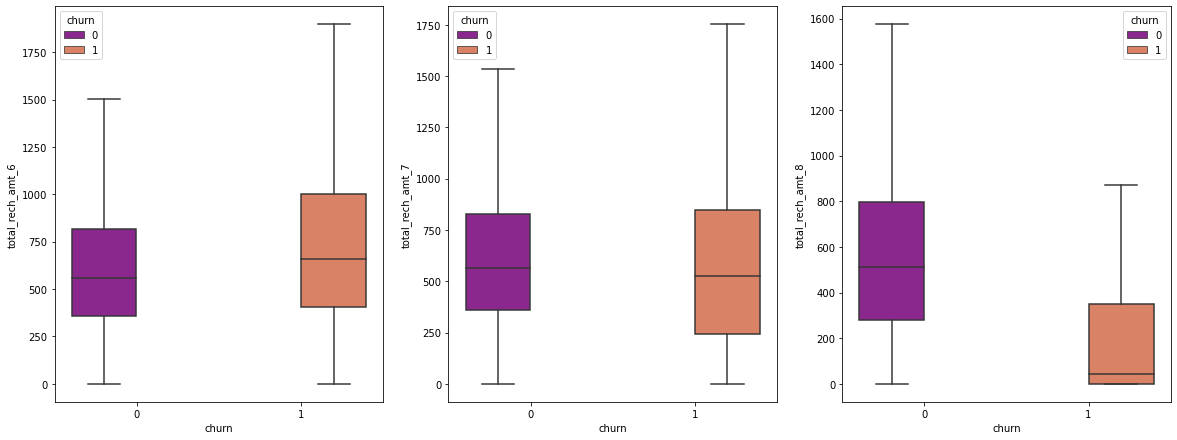

In [32]:
# Ploting for total recharge amount:
plot_box_chart('total_rech_amt')

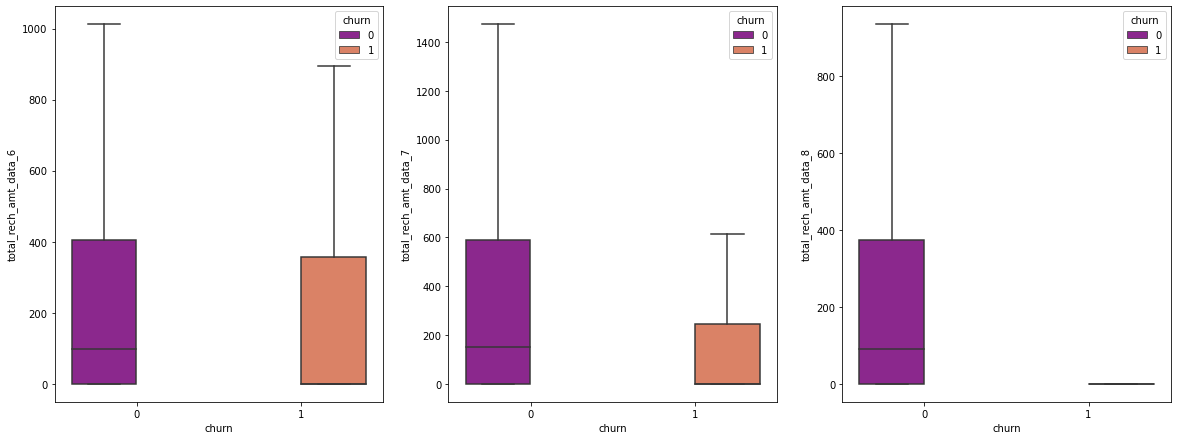

In [33]:
plot_box_chart('total_rech_amt_data')

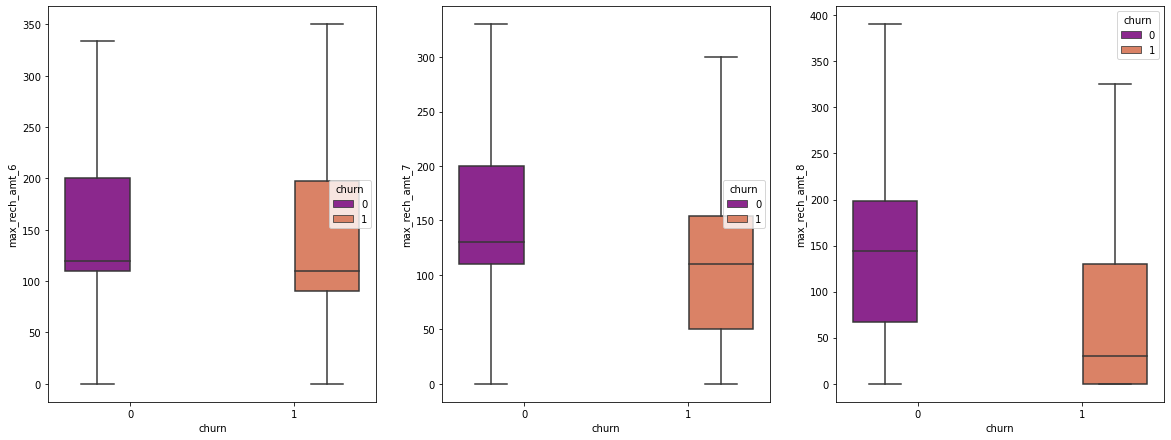

In [34]:
plot_box_chart('max_rech_amt')

Observation: We can see that there is a huge drop in maximum recharge amount for data in the 8th month (action phase) for churned customers.

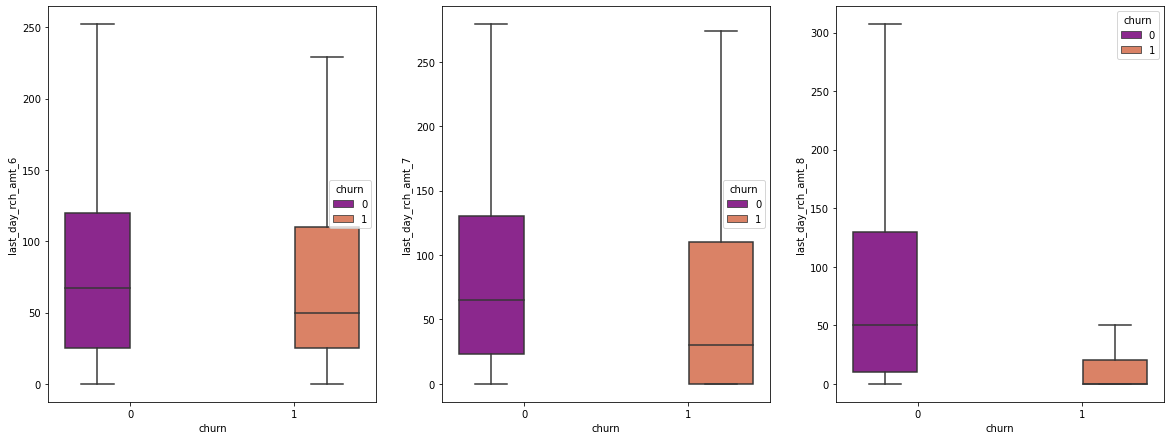

In [35]:
plot_box_chart('last_day_rch_amt')

Observation:  We are getting a huge drop in 8th month recharge amount for churned customers.

In [36]:
#Remove Data which has only 1 unique Value

#List of columns with only 1 unqiue value
col_list = telecom_high_value_cust.loc[:,telecom_high_value_cust.apply(pd.Series.nunique) == 1]
col_list.head(5)

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8
0,109,0.0,0.0,0.0,30,31,31,0.0,0.0,0.0,0.0,0.0,0.0
7,109,0.0,0.0,0.0,30,31,31,0.0,0.0,0.0,0.0,0.0,0.0
8,109,0.0,0.0,0.0,30,31,31,0.0,0.0,0.0,0.0,0.0,0.0
21,109,0.0,0.0,0.0,30,31,31,0.0,0.0,0.0,0.0,0.0,0.0
23,109,0.0,0.0,0.0,30,31,31,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
#Remove Columns with only 1 unique value
telecom_high_value_cust = telecom_high_value_cust.loc[:,telecom_high_value_cust.apply(pd.Series.nunique) != 1]
telecom_high_value_cust.shape

(29953, 164)

In [38]:
#Checking for Columns that can be changed to integers, floats or other types
object_col_data = telecom_high_value_cust.select_dtypes(include=['object'])
print(object_col_data.iloc[0])

Series([], Name: 0, dtype: float64)


In [39]:
# convert to datetime
for col in object_col_data.columns:
    telecom_high_value_cust[col] = pd.to_datetime(telecom_high_value_cust[col])

telecom_high_value_cust.shape

(29953, 164)

In [40]:
#Let's drop Columns with > 30% of missing values 
columns = telecom_high_value_cust.columns
percent_missing = telecom_high_value_cust.isnull().sum() * 100 / len(telecom_high_value_cust)
missing_value_df = pd.DataFrame({'column_name': columns,
                                 'percent_missing': percent_missing})

drop_col = missing_value_df.loc[(missing_value_df["column_name"].str.contains('_9')==False) & (missing_value_df["percent_missing"] > 30.0)]["column_name"]
drop_col

Series([], Name: column_name, dtype: object)

In [41]:
telecom_high_value_cust.sample(10)

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_avg_rech_amnt_6_7,churn
73553,7001545739,390.321,438.078,200.824,0.00,8.13,1.13,242.61,258.58,14.69,0.00,2.76,0.00,0.00,0.00,0.00,0.00,8.13,1.13,239.46,206.26,13.31,3.14,17.49,1.38,0.00,0.00,0.0,242.61,231.89,15.83,0.00,0.00,0.00,0.00,0.00,0.00,0.00,34.81,0.00,0.00,34.81,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,242.61,266.71,15.83,227.86,285.66,178.63,360.48,583.59,360.03,12.76,62.89,27.06,601.11,932.16,565.73,0.00,0.00,0.26,0.00,0.16,1.13,81.43,26.16,0.11,81.43,26.33,1.51,692.96,960.48,567.24,0.00,0.0,0.0,0.00,0.00,0.00,10.41,1.98,0.00,7,10,3,444,519,234,179,179,179,27,31,27,20,25,25,24,31,27,2.0,2.0,2.0,179.0,179.0,179.0,1.0,1.0,1.0,1.0,1.0,1.0,204.0,204.0,204.0,31.17,13.58,7.00,786.48,722.10,803.15,158.990,4.87,161.60,170.290,0.000,150.67,0.0,0.0,0.0,0,0,0,1,1,1,1,1,1,0,0,0,1.0,1.0,1.0,2998,289.68,260.96,541.73,0.0,408.0,408.0,408.0,889.5,0
41562,7001784621,704.666,573.255,407.138,786.71,1004.76,698.71,48.21,49.04,94.43,209.58,0.00,0.00,276.76,0.00,0.00,7.83,27.13,6.19,2.50,18.49,18.01,0.00,1.54,0.00,0.00,0.00,0.0,10.33,47.18,24.21,524.56,977.63,692.51,23.26,28.99,76.41,0.00,0.00,0.00,547.83,1006.63,768.93,0.00,0.00,0.00,7.26,6.63,8.89,0.0,0.0,0.0,565.43,1060.44,802.04,8.23,38.89,20.21,0.43,39.73,12.93,0.00,13.79,0.78,8.66,92.43,33.93,4.09,5.99,3.93,0.11,0.61,8.74,0.00,0.00,0.00,4.21,6.61,12.68,14.74,102.44,52.39,0.15,0.2,0.0,0.00,0.00,0.88,1.71,3.19,4.90,15,14,7,813,696,443,110,110,130,28,28,29,0,110,23,28,19,31,1.0,4.0,0.0,23.0,23.0,152.0,1.0,4.0,1.0,0.0,0.0,0.0,23.0,92.0,0.0,0.01,0.00,0.00,0.00,0.00,0.00,0.000,0.00,10.02,0.200,0.000,20.00,0.0,0.0,0.0,0,

In [42]:
telecom_high_value_cust.drop(drop_col, axis=1, inplace=True)
telecom_high_value_cust.shape

(29953, 164)

In [43]:
#Drop Rows with all Null Values
telecom_high_value_cust = telecom_high_value_cust.dropna(how='all',axis=0) 
telecom_high_value_cust.shape

(29953, 164)

<AxesSubplot:>

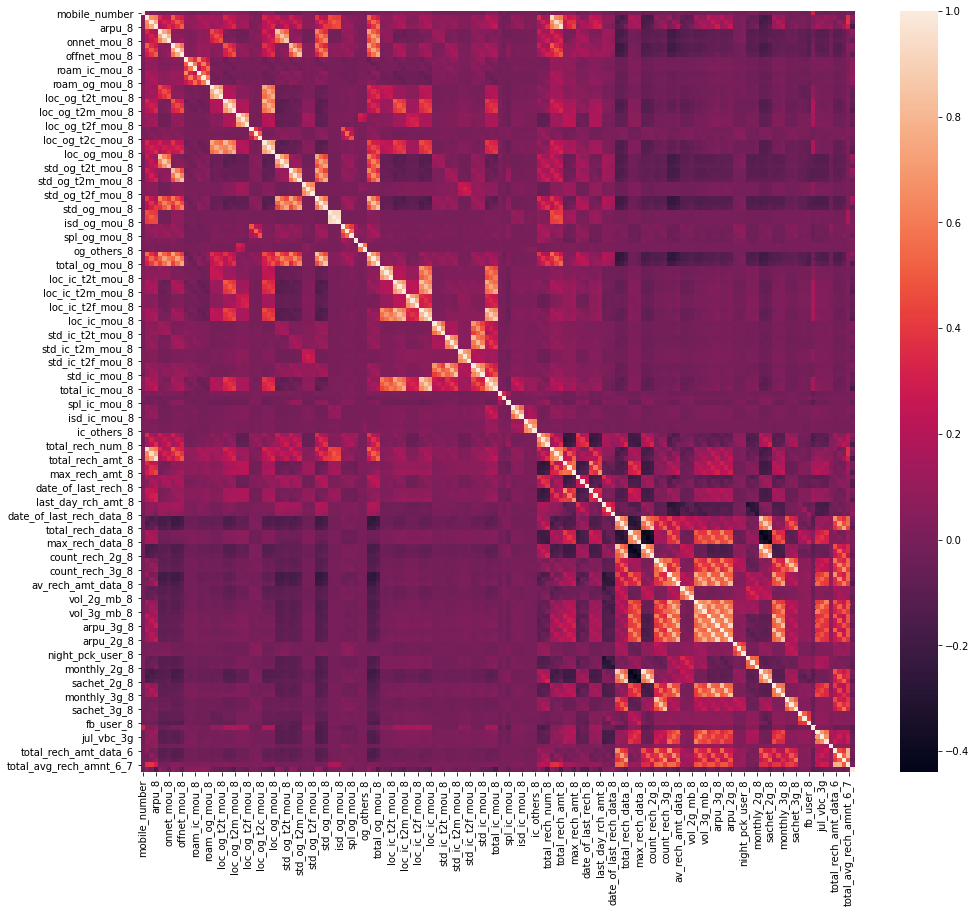

In [44]:
plt.figure(figsize=[16,14])
sns.heatmap(telecom_high_value_cust.corr())

The heatmap shows so many multicolinear variables, Next step is to find the correlation coefficient of the variables and remove that has more than 60 in both positive and negative coefficient

In [45]:
#Find Highly correlated data and drop Highly Correlated Columns
cor = telecom_high_value_cust.corr()
cor.loc[:,:] = np.tril(cor, k=-1)
cor = cor.stack()
cor[(cor > 0.60) | (cor < -0.60)].sort_values()

monthly_3g_6             vol_3g_mb_6              0.601325
roam_og_mou_8            roam_og_mou_7            0.601340
total_ic_mou_7           loc_ic_t2t_mou_7         0.601369
arpu_3g_6                count_rech_3g_6          0.601971
arpu_2g_7                arpu_3g_6                0.601989
total_rech_amt_data_8    av_rech_amt_data_8       0.602903
std_ic_mou_6             std_ic_t2m_mou_7         0.603194
total_rech_amt_8         arpu_6                   0.604021
arpu_3g_7                vol_3g_mb_8              0.604373
total_ic_mou_8           loc_ic_t2t_mou_8         0.604763
count_rech_2g_7          total_rech_data_8        0.605265
loc_og_mou_6             loc_og_t2t_mou_7         0.605584
std_ic_mou_7             std_ic_t2m_mou_8         0.605846
roam_ic_mou_8            roam_ic_mou_7            0.606152
arpu_2g_8                max_rech_data_8          0.606790
aug_vbc_3g               vol_3g_mb_8              0.607485
std_ic_t2m_mou_8         std_ic_t2m_mou_6         0.6079

In [46]:
drop_col_list = ['loc_og_t2m_mou_6','std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2m_mou_6',
                'std_og_t2m_mou_7','std_og_t2m_mou_8','total_og_mou_6','total_og_mou_7','total_og_mou_8',
                'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8',
                'std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8',
                'total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8',
                'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8',
                'loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8',
                'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']
                 
telecom_high_value_cust.drop(drop_col_list, axis=1, inplace=True)
telecom_high_value_cust.shape

(29953, 122)

In [47]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

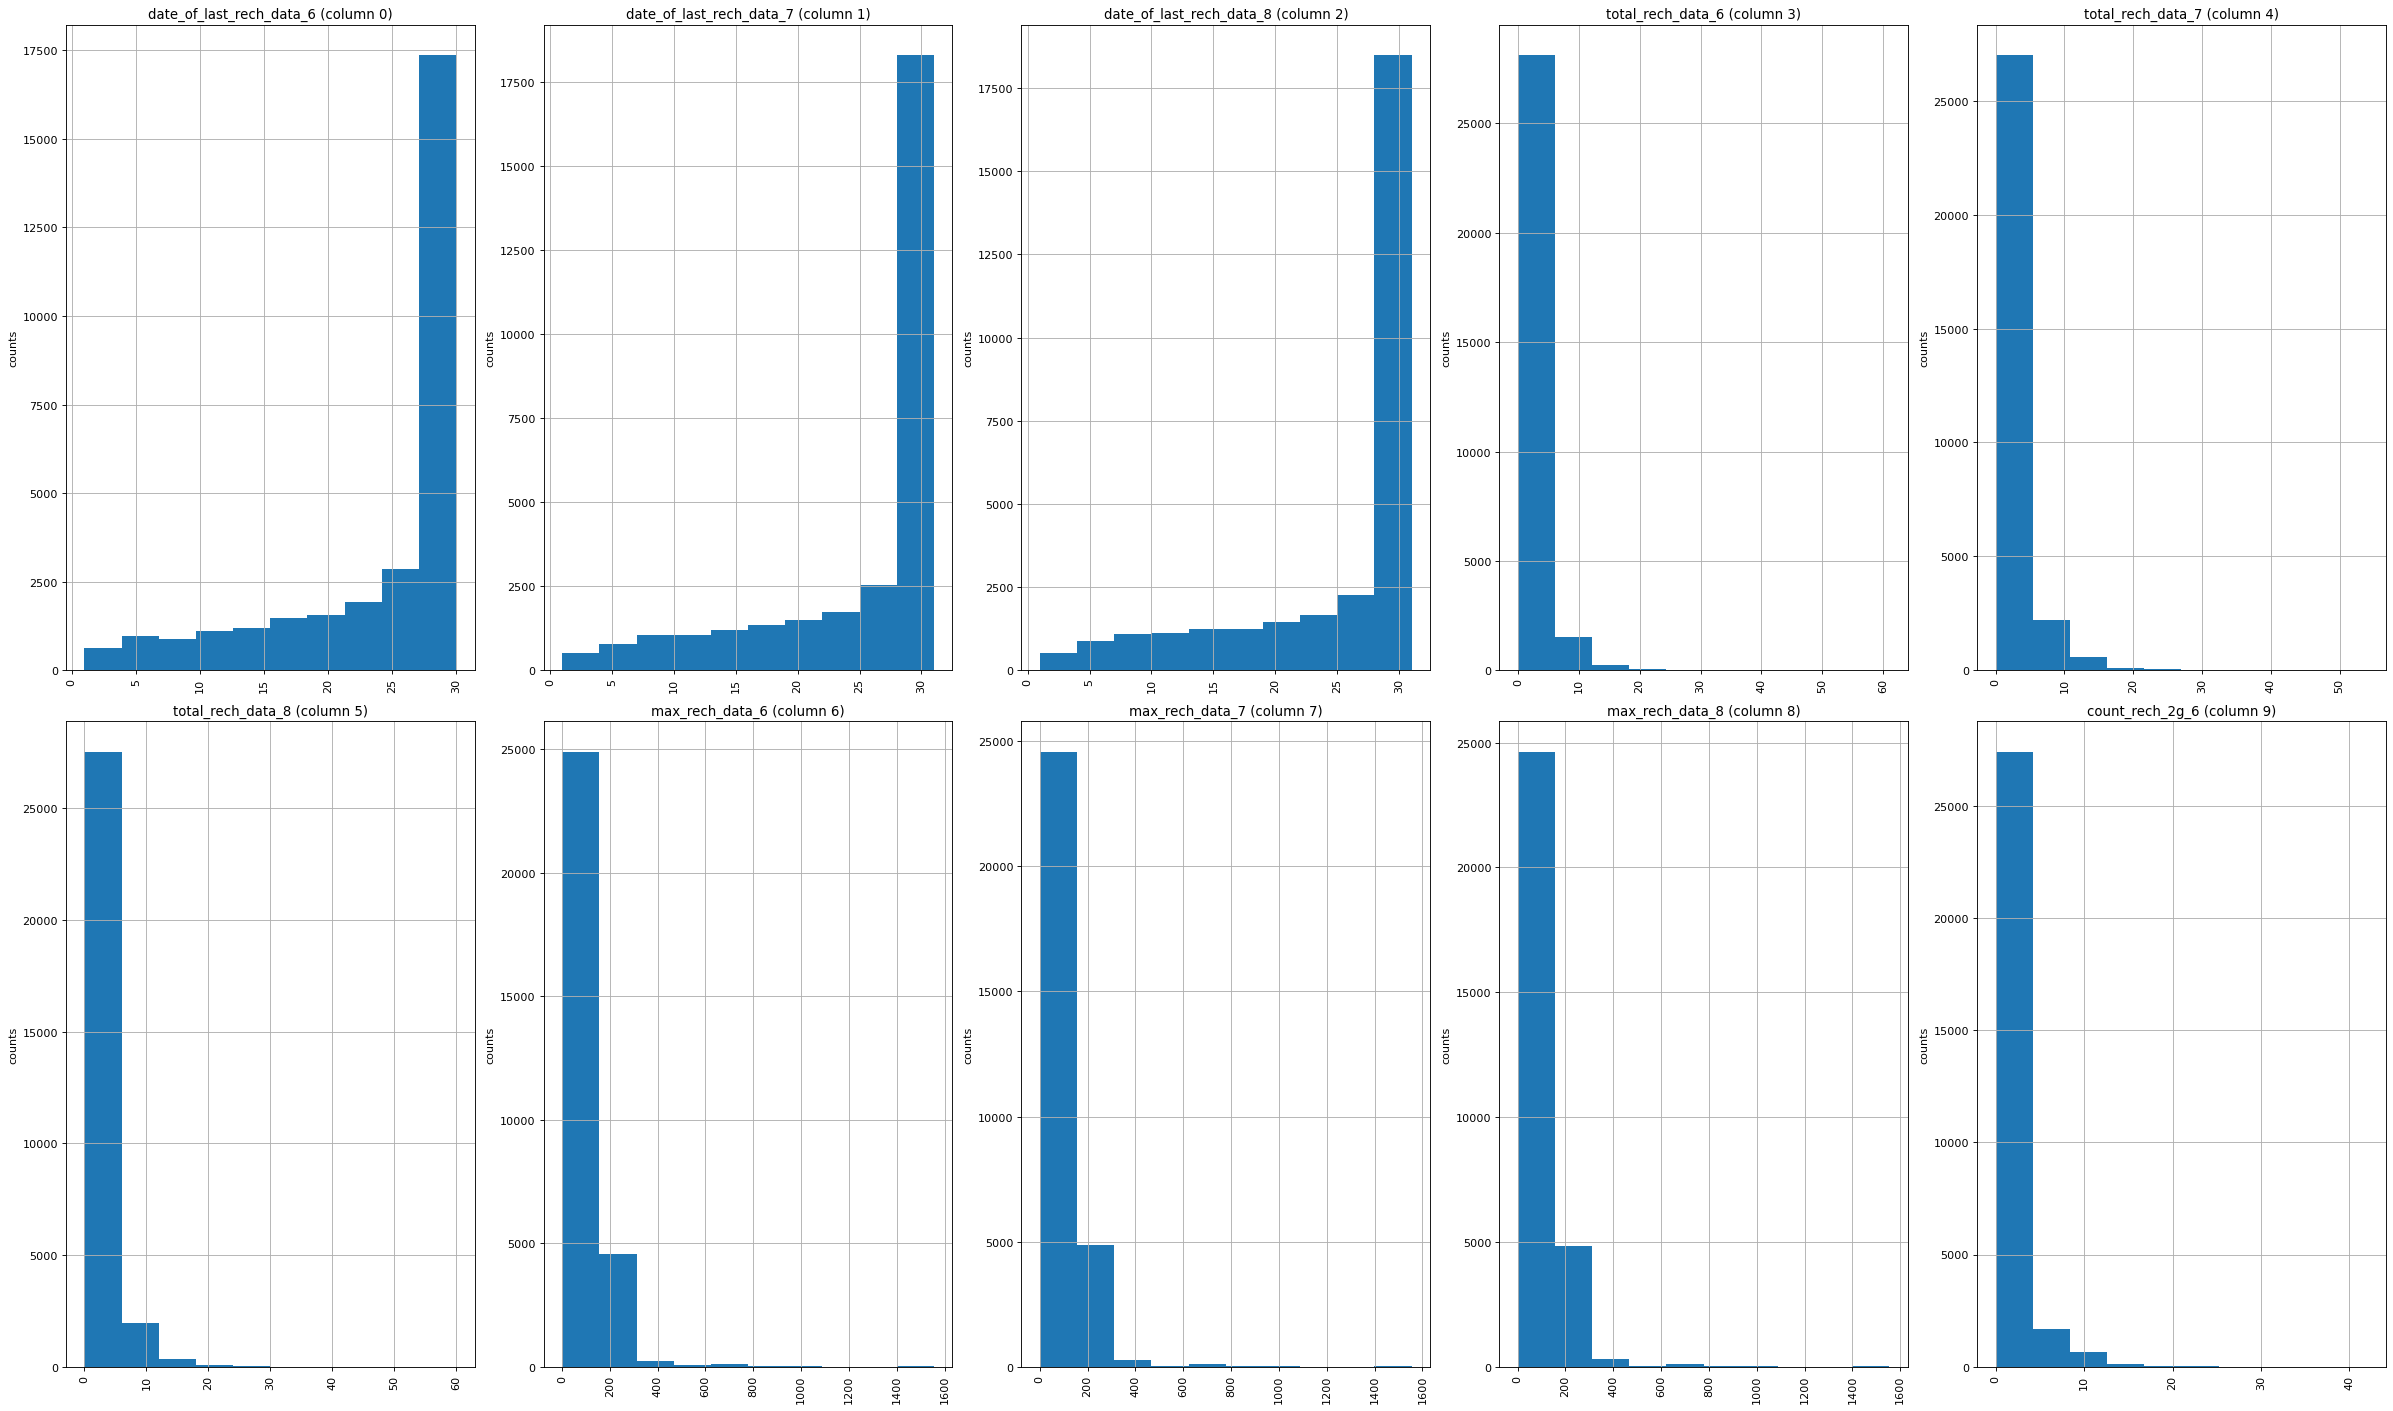

In [48]:
plotPerColumnDistribution(telecom_high_value_cust, 10, 5)

The histogram is skewed for all the variables with less than 50 unique values. The variables are also seem to be unbalanced like the target variable

In [49]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

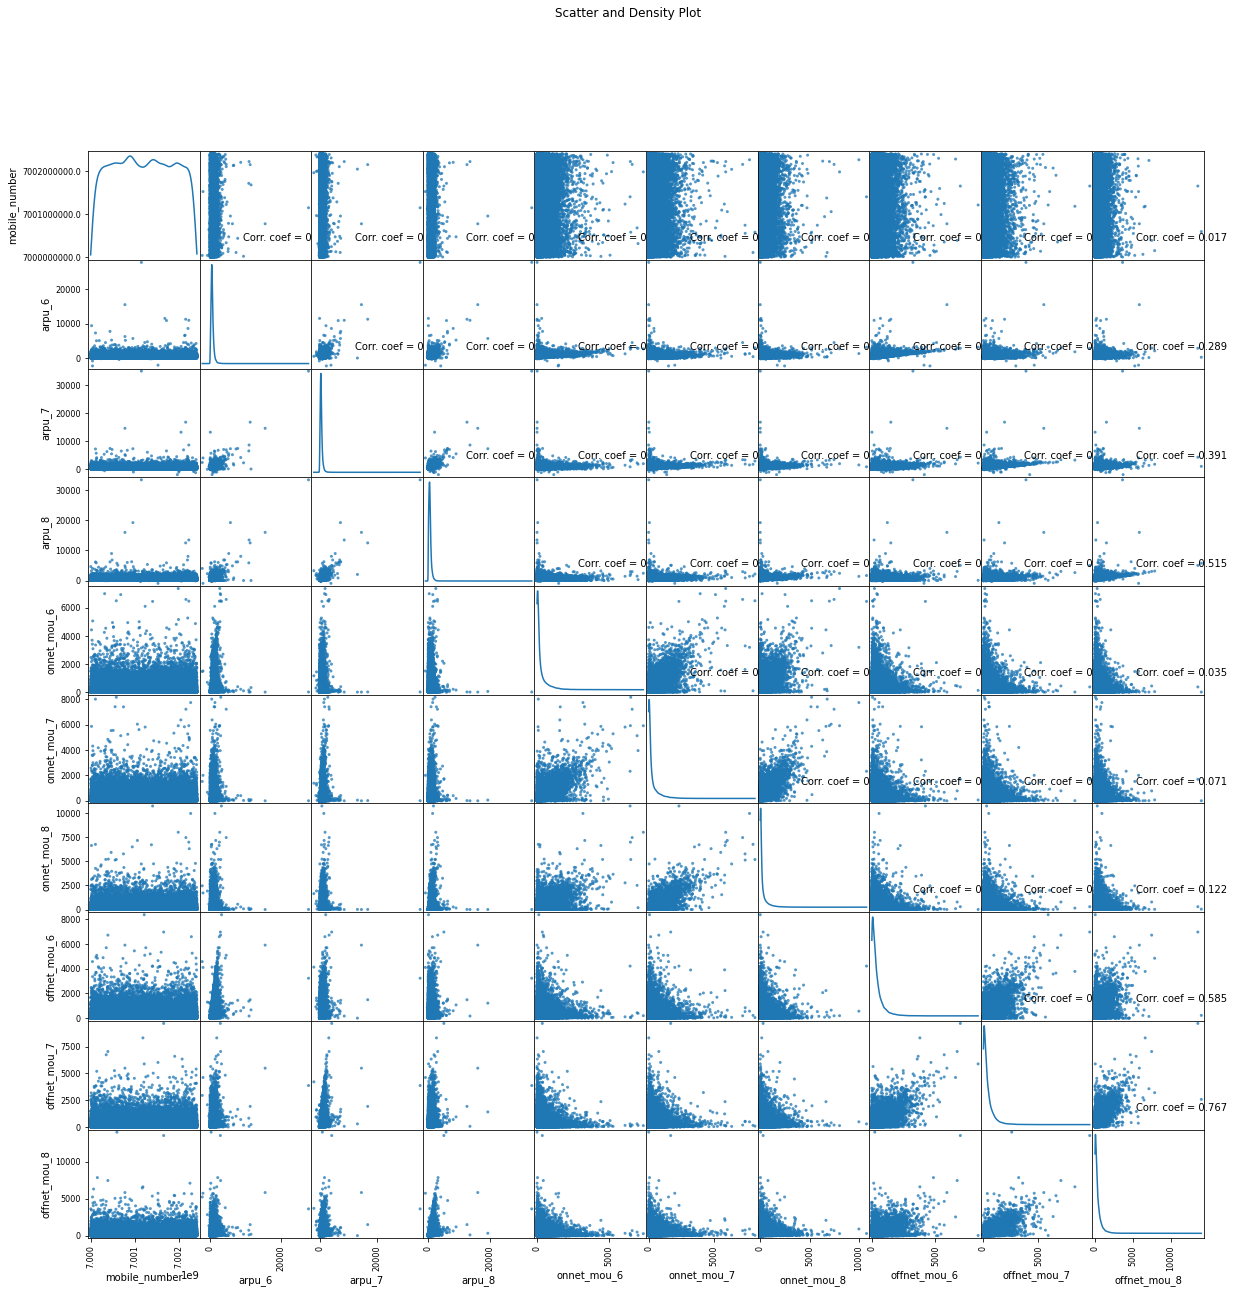

In [50]:
plotScatterMatrix(telecom_high_value_cust, 20, 10)

The above scatter plot shows that not many feature has linear relation visually and the logistic and random forest may be the best fit for the model

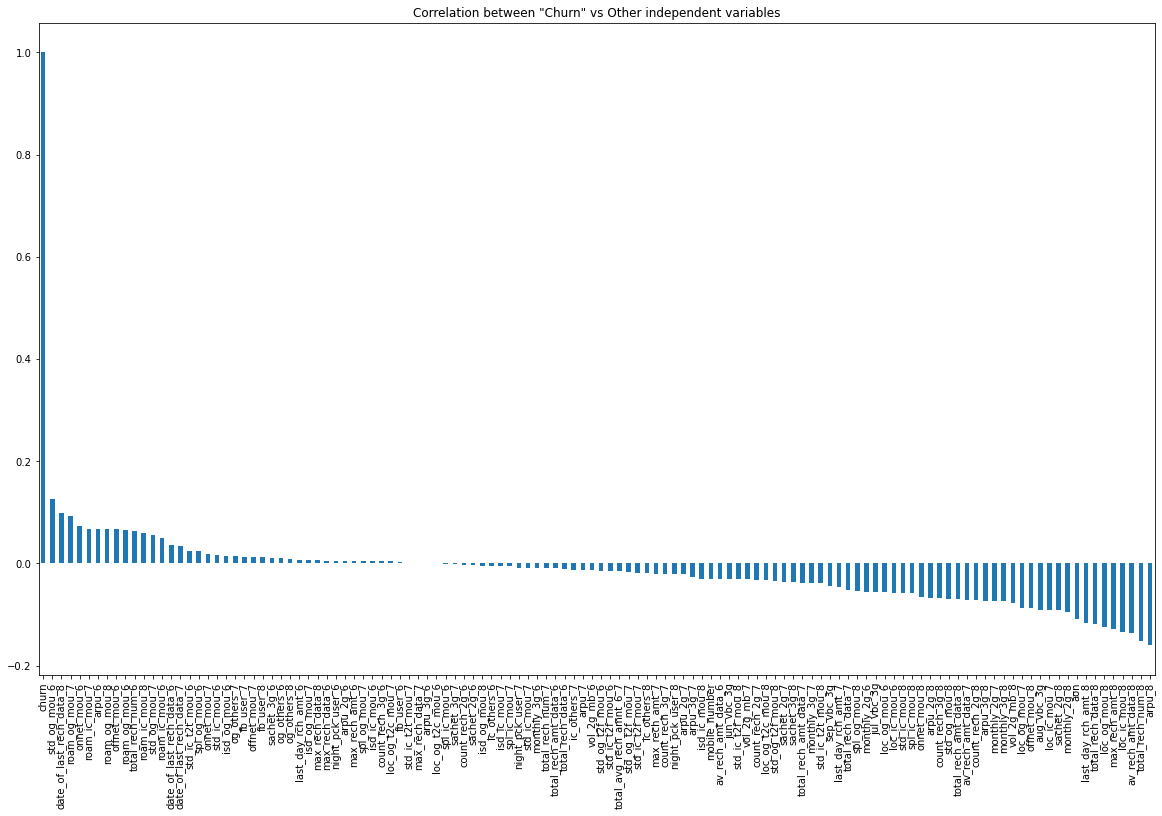

In [51]:
plt.figure(figsize=(20, 12))
telecom_high_value_cust.corr()['churn'].sort_values(ascending=False).plot(kind='bar')
plt.title('Correlation between "Churn" vs Other independent variables')
plt.show()


The above plot shows that there is no multicollinearity in the dataset, so we can start the modeling with all the available variables 

In [52]:
#telecom_high_value_cust.sample(10)

In [53]:
# Shape of the dataframe after removing the multicollinear variables
telecom_high_value_cust.shape

(29953, 122)

In [54]:
telecom_high_value_cust.columns

Index(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8',
       ...
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g',
       'total_rech_amt_data_6', 'total_rech_amt_data_7',
       'total_rech_amt_data_8', 'total_avg_rech_amnt_6_7', 'churn'],
      dtype='object', length=122)

In [55]:
# Converting AON to Months
telecom_high_value_cust['aon_mon'] = telecom_high_value_cust['aon']/30
telecom_high_value_cust.drop('aon', axis=1, inplace=True)
telecom_high_value_cust['aon_mon'].head()

0     32.266667
7     26.733333
8     10.500000
21    24.000000
23    20.133333
Name: aon_mon, dtype: float64

Text(0.5, 1.0, 'Churn Distribution')

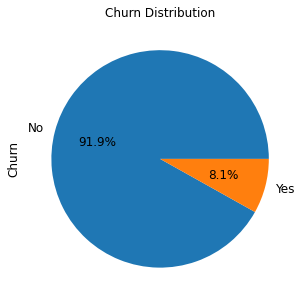

In [56]:
# Distribution of target variable
ax = (telecom_high_value_cust['churn'].value_counts()*100.0 /len(telecom_high_value_cust)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           

ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('Churn Distribution', fontsize = 12)

Observation: As we see, in data, ~92% of the customers do not churn. Clearly the data is skewed as we would expect a large majority of the customers to not churn. This is important to keep in mind for our modelling as skeweness could lead to a lot of false negatives. We will see in the modelling section on how to avoid skewness in the data.

# 2. Modelling
## 2.1 Splitting Train and Test dataset

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [58]:
# Creating Target and Independent variables
X = telecom_high_value_cust.drop(["churn","mobile_number"], axis=1)
y = telecom_high_value_cust["churn"]

In [59]:
X.head(10)

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_avg_rech_amnt_6_7,aon_mon
0,197.385,214.816,213.803,88.14,86.89,0.00,229.63,227.13,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,129.48,132.89,0.00,0.00,0.00,0.00,50.71,50.06,0.00,0.00,0.00,0.00,0.31,0.81,0.00,0.00,0.0,0.0,138.73,141.86,5.44,0.48,0.55,0.00,0.00,0.00,0.00,11.98,12.74,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,252,252,252,252,252,252,21,16,8,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,212.170,212.17,212.17,212.170,212.170,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,30.40,0.00,101.20,3.58,252.0,252.0,252.0,559.0,32.266667
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,0.00,0.0,0.00,422.16,533.91,255.79,6.66,20.08,16.68,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,427.88,355.23,188.04,36.89,11.83,30.39,52.19,34.24,22.21,180.54,173.08,193.94,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,1580,0,0,779,30,31,31,0.0,0.0,0.0,152.0,152.0,152.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,15.605,13.00,10.02,27.085,24.065,20.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,1.0,57.74,19.38,18.74,0.00,0.0,0.0,0.0,1185.0,26.733333
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,7.15,378.09,288.18,63.04,0.00,0.00,0.00,130.26,143.48,98.28,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,81.43,23.83,15.79,0.00,0.58,0.10,0.00,0.00,0.00,22.43,4.66,0.75,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,90,154,30,50,0,10,30,31,23,0.0,2.0,3.0,152.0,154.0,23.0,1.0,2.0,3.0,0.0,0.0,0.0,0.0,177.0,69.0,0.00,356.00,0.03,15.605,0.00,19.83,27.085,0.000,0.00,0.0,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,1.0,1.0,1.0,21.03,910.65,122.16,0.00,0.0,354.0,207.0,696.0,10.500000
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,97.04,94.09,129.74,0.00,0.00,0.00,763.29,934.69,938.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,125.33,87.68,159.11,14.06,5.98,0.18,0.00,0.00,0.00,81.76,44.21,101.93,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,22,26,27,50,50,50,30,20,50,30,31,31,0.0,0.0,0.0,152.0,152.0,152.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,15.605,13.00,10.02,27.085,24.065,20.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1

In [60]:
# Scaling the variable X with standard scalar
X_scaled = scaler.fit_transform(X)

In [61]:
# Splitting train-test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.7, test_size=0.3, random_state=100)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (20967, 120)
y_train shape: (20967,)
X_test shape: (8986, 120)
y_test shape: (8986,)


## 2.2 Logistic regression

In [62]:
# Class_weight='balanced' was used due to manage the imbalance in the dataframe
lr = LogisticRegression(class_weight="balanced") 
model_lr = lr.fit(X_train, y_train)

In [63]:
# Predictions on train dataset
pred_train = model_lr.predict_proba(X_train)
y_pred_train = model_lr.predict(X_train)

# Predictions on test dataset
pred_test = model_lr.predict_proba(X_test)
y_pred_test = model_lr.predict(X_test)

In [64]:
# Printing Confusion matrix
print(confusion_matrix(y_train, y_pred_train))
print("Accuracy Score in train dataset:", accuracy_score(y_train, y_pred_train))
print("Accuracy Score in test dataset:", accuracy_score(y_test, y_pred_test))

[[16030  3185]
 [  261  1491]]
Accuracy Score in train dataset: 0.8356464921066438
Accuracy Score in test dataset: 0.8246160694413532


In [65]:
y_pred_df = pd.DataFrame(pred_train)
y_pred_df_test = pd.DataFrame(pred_test)

y_pred = y_pred_df.iloc[:,[1]]
y_pred_test = y_pred_df_test.iloc[:,[1]]

y_pred.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_pred_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

y_pred_final = pd.concat([y_train, y_pred], axis=1)
y_pred_final_test = pd.concat([y_test, y_pred_test], axis=1)
 
y_pred_final = y_pred_final.rename(columns = { 1 : "churn_prob"}) #Renaming the column
y_pred_final_test = y_pred_final_test.rename(columns = { 1 : "churn_prob"})

In [66]:
# Plotting ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label="ROC curve (area = %0.2f)" % auc_score )
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate or [1 - True Negative Rate]")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic example")
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [67]:
# AUC
fpr, tpr, thresholds =roc_curve(y_pred_final.churn, y_pred_final.churn_prob)
auc = auc(fpr, tpr)
print("AUC:", auc)

AUC: 0.9129683989273031


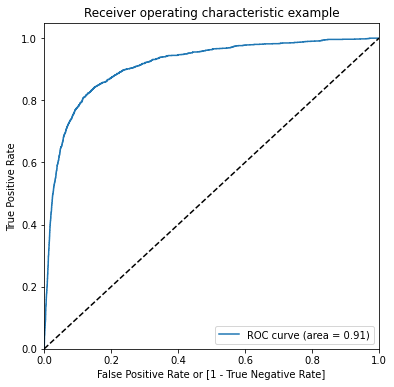

(array([0.        , 0.        , 0.        , ..., 0.99989591, 0.99994796,
        1.        ]),
 array([0.00000000e+00, 5.70776256e-04, 1.14155251e-03, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([1.99978051e+00, 9.99780509e-01, 9.99659954e-01, ...,
        1.39352946e-20, 5.13944474e-28, 2.43861380e-99]))

In [68]:
draw_roc(y_pred_final.churn, y_pred_final.churn_prob)

In [69]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i] = y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)

In [70]:
# calculating accuracy sensitivity and specificity for a range of probabilities
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.083560     0.000000     1.000000
0.1          0.1  0.437211     0.387874     0.978311
0.2          0.2  0.593886     0.561176     0.952626
0.3          0.3  0.698049     0.676971     0.929224
0.4          0.4  0.775027     0.763882     0.897260
0.5          0.5  0.835646     0.834244     0.851027
0.6          0.6  0.880479     0.888316     0.794521
0.7          0.7  0.912148     0.929794     0.718607
0.8          0.8  0.930319     0.961384     0.589612
0.9          0.9  0.931273     0.985116     0.340753


<AxesSubplot:xlabel='probability'>

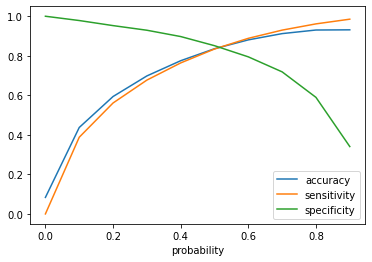

In [71]:
# Plotting accuracy vs. sensitivity vs. specificity for various probabilities.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])

In [72]:
# Creating new column 'pred_churn' with 1 if churn_prob > 0.5 else 0
y_pred_final["pred_churn"] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.50 else 0)

y_pred_final.churn.value_counts()

0    19215
1     1752
Name: churn, dtype: int64

In [73]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.pred_churn)
confusion

array([[16030,  3185],
       [  261,  1491]], dtype=int64)

In [74]:
TP = confusion[1,1] #true positive 
TN = confusion[0,0] #true negative
FP = confusion[0,1] #false positive
FN = confusion[1,0] #false negative

print("Accuracy Score: ", accuracy_score(y_train, y_pred_final["pred_churn"]))
print("Sensitivity: ", TP/float(TP+FN))
print("Specificity: ", TN/float(TN+FP))
print("False Postive Rate: ", FP/float(TN+FP))
print("Positive Predictive Value: ", TP/float(TP+FP))
print("Negative Predictive Value: ",TN/float(TN+ FN))
print("Misclassification Rate: ", (FN+FP)/(TP+TN+FP+FN))

Accuracy Score:  0.8356464921066438
Sensitivity:  0.851027397260274
Specificity:  0.8342440801457195
False Postive Rate:  0.1657559198542805
Positive Predictive Value:  0.3188622754491018
Negative Predictive Value:  0.983978884046406
Misclassification Rate:  0.16435350789335623


In [75]:
# Churn prediction in test dataset
y_pred_final_test["pred_churn"] = y_pred_final_test.churn_prob.map( lambda x: 1 if x > 0.50 else 0)
confusion = metrics.confusion_matrix(y_pred_final_test.churn, y_pred_final_test.pred_churn)

TP = confusion[1,1] #true positive 
TN = confusion[0,0] #true negative
FP = confusion[0,1] #false positive
FN = confusion[1,0] #false negative

print("Accuracy Score: ", accuracy_score(y_test, y_pred_final_test["pred_churn"]))
print("Sensitivity: ", TP/float(TP+FN))
print("Specificity: ", TN/float(TN+FP))
print("False Postive Rate: ", FP/float(TN+FP))
print("Positive Predictive Value: ", TP/float(TP+FP))
print("Negative Predictive Value: ",TN/float(TN+ FN))
print("Misclassification Rate: ", (FN+FP)/(TP+TN+FP+FN))

Accuracy Score:  0.8246160694413532
Sensitivity:  0.8516886930983847
Specificity:  0.8223961468994582
False Postive Rate:  0.17760385310054183
Positive Predictive Value:  0.2822384428223844
Negative Predictive Value:  0.9854277881979512
Misclassification Rate:  0.1753839305586468


## 2.21 Hyper parameter tuning

In [76]:
from sklearn.model_selection  import StratifiedKFold
st_Kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=9999)

In [77]:
from sklearn.linear_model import LogisticRegressionCV

searchCV = LogisticRegressionCV(Cs= list(np.power(10.0, np.arange(-10, 10))), penalty='l2', scoring='roc_auc', cv=st_Kfold, 
                                random_state=999, max_iter=100, fit_intercept=True, solver='newton-cg', tol=1, verbose = 2,
                                n_jobs = -1)

In [78]:
searchCV.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   13.1s finished


LogisticRegressionCV(Cs=[1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001,
                         0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0,
                         100000.0, 1000000.0, 10000000.0, 100000000.0,
                         1000000000.0],
                     cv=StratifiedKFold(n_splits=5, random_state=9999, shuffle=True),
                     n_jobs=-1, random_state=999, scoring='roc_auc',
                     solver='newton-cg', tol=1, verbose=2)

In [79]:
pred_L2Search_train = searchCV.predict(X_train)
pred_L2Search_test = searchCV.predict(X_test)
pred_L2Search_prob_train = searchCV.predict_proba(X_train)[:,1]
pred_L2Search_prob_test = searchCV.predict_proba(X_train)[:,1]
print("Report for the train dataset: ", "\n", classification_report(y_train, pred_L2Search_train))
print("Report for the test dataset: ", "\n", classification_report(y_test, pred_L2Search_test))

accuracy_train = metrics.accuracy_score(y_train, pred_L2Search_train)
accuracy_test = metrics.accuracy_score(y_test, pred_L2Search_test)
print("Accuracy in train dataset: ", accuracy_train)
print("Accuracy in test dataset: ", accuracy_test)

Report for the train dataset:  
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     19215
           1       0.74      0.39      0.51      1752

    accuracy                           0.94     20967
   macro avg       0.85      0.69      0.74     20967
weighted avg       0.93      0.94      0.93     20967

Report for the test dataset:  
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      8305
           1       0.74      0.36      0.48       681

    accuracy                           0.94      8986
   macro avg       0.84      0.67      0.73      8986
weighted avg       0.93      0.94      0.93      8986

Accuracy in train dataset:  0.937663948108933
Accuracy in test dataset:  0.9417983529935455


In [80]:
confusion = confusion_matrix(y_train, pred_L2Search_train)
confusion

array([[18982,   233],
       [ 1074,   678]], dtype=int64)

In [81]:
TP = confusion[1,1] #true positive 
TN = confusion[0,0] #true negative
FP = confusion[0,1] #false positive
FN = confusion[1,0] #false negative

print("Accuracy Score: ", accuracy_score(y_train, pred_L2Search_train))
print("Sensitivity: ", TP/float(TP+FN))
print("Specificity: ", TN/float(TN+FP))
print("False Postive Rate: ", FP/float(TN+FP))
print("Positive Predictive Value: ", TP/float(TP+FP))
print("Negative Predictive Value: ",TN/float(TN+ FN))
print("Misclassification Rate: ", (FN+FP)/(TP+TN+FP+FN))

Accuracy Score:  0.937663948108933
Sensitivity:  0.386986301369863
Specificity:  0.9878740567265157
False Postive Rate:  0.012125943273484258
Positive Predictive Value:  0.7442371020856202
Negative Predictive Value:  0.9464499401675309
Misclassification Rate:  0.06233605189106692


In [82]:
confusion = confusion_matrix(y_test, pred_L2Search_test)
confusion

array([[8218,   87],
       [ 436,  245]], dtype=int64)

In [83]:
TP = confusion[1,1] #true positive 
TN = confusion[0,0] #true negative
FP = confusion[0,1] #false positive
FN = confusion[1,0] #false negative

print("Accuracy Score:", accuracy_score(y_test, pred_L2Search_test))
print("Sensitivity:", TP/float(TP+FN))
print("Specificity:", TN/float(TN+FP))
print("False Postive Rate:", FP/float(TN+FP))
print("Positive Predictive Value:", TP/float(TP+FP))
print("Negative Predictive Value:",TN/float(TN+ FN))
print("Misclassification Rate:", (FN+FP)/(TP+TN+FP+FN))

Accuracy Score: 0.9417983529935455
Sensitivity: 0.35976505139500736
Specificity: 0.9895243829018664
False Postive Rate: 0.010475617098133655
Positive Predictive Value: 0.7379518072289156
Negative Predictive Value: 0.9496186734458054
Misclassification Rate: 0.058201647006454485


## 3. Random Forest

In [84]:
# Random forest cassification is created with balance approach
rf_all = RandomForestClassifier(class_weight="balanced", n_estimators = 1000, max_depth = 6, min_samples_split=5)

In [85]:
trained_rf = rf_all.fit(X_train, y_train)

In [86]:
preds_train = trained_rf.predict(X_train)
preds_test = trained_rf.predict(X_test)

pred_prob_train = trained_rf.predict_proba(X_train)[:,1]
pred_prob_test = trained_rf.predict_proba(X_test)[:,1]

In [87]:
accuracy_train_rf_all = metrics.accuracy_score(y_train, preds_train)
accuracy_test_rf_all = metrics.accuracy_score(y_test, preds_test)

print("Accuracy in the train dataset:", accuracy_train_rf_all)
print("Accuracy in the test dataset:", accuracy_test_rf_all)

print("Classification report on train dataset:", "\n", classification_report(y_train, preds_train))
print("Classification report on test dataset:", "\n", classification_report(y_test, preds_test))

Accuracy in the train dataset: 0.9061382171984547
Accuracy in the test dataset: 0.9024037391497886
Classification report on train dataset: 
               precision    recall  f1-score   support

           0       0.98      0.92      0.95     19215
           1       0.46      0.81      0.59      1752

    accuracy                           0.91     20967
   macro avg       0.72      0.86      0.77     20967
weighted avg       0.94      0.91      0.92     20967

Classification report on test dataset: 
               precision    recall  f1-score   support

           0       0.98      0.91      0.95      8305
           1       0.42      0.77      0.54       681

    accuracy                           0.90      8986
   macro avg       0.70      0.84      0.74      8986
weighted avg       0.94      0.90      0.91      8986



ROC AUC in train dataset 0.9455930963846975


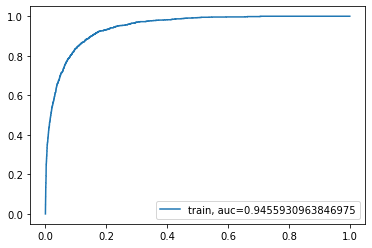

In [88]:
# ROC in train dataset
fpr, tpr, threshold = metrics.roc_curve(y_train, pred_prob_train)
auc_train_rf = metrics.auc(fpr, tpr)
print("ROC AUC in train dataset", auc_train_rf)
plt.plot(fpr, tpr, label = "train, auc=" + str(auc_train_rf))
plt.legend(loc = 4)

ROC AUC in test dataset 0.9239760560354544


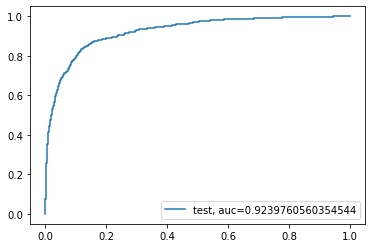

In [89]:
# ROC in test dataset
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_prob_test)
auc_test_rf = metrics.auc(fpr, tpr)
print("ROC AUC in test dataset", auc_test_rf)
plt.plot(fpr, tpr, label = "test, auc=" + str(auc_test_rf))
plt.legend(loc = 4)

## 4. XGBoost

In [90]:
# XGBoost hyper parameters and fitting the model
xgboost = xgb.XGBClassifier(n_estimators=1000, learning_rate=0.001, n_jobs=-1, max_depth=6, colsample_bytree=1, gamma=0.1,
                            cv = None, scoring="f1_weighted", reg_alpha=0, reg_lambda=1, eval_metric="auc",
                           objective="binary:hinge", booster = "gbtree", tree_method = "exact", min_child_weight = 15)

xgb_model = xgboost.fit(X_train, y_train)

[10:34:44] WARNING: ..\src\learner.cc:541: 
Parameters: { scoring } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [91]:
# Training the model
preds_train = xgb_model.predict(X_train)
preds_test = xgb_model.predict(X_test)

accuracy_train = metrics.accuracy_score(y_train, preds_train)
accuracy_test = metrics.accuracy_score(y_test, preds_test)

print("Accuracy in the train dataset:", accuracy_train)
print("Accuracy in the test dataset:", accuracy_test)

print("Classification report on train dataset:", "\n", classification_report(y_train, preds_train))
print("Classification report on test dataset:", "\n", classification_report(y_test, preds_test))

Accuracy in the train dataset: 0.9354700243239377
Accuracy in the test dataset: 0.9354551524593813
Classification report on train dataset: 
               precision    recall  f1-score   support

           0       0.97      0.96      0.96     19215
           1       0.60      0.67      0.63      1752

    accuracy                           0.94     20967
   macro avg       0.79      0.81      0.80     20967
weighted avg       0.94      0.94      0.94     20967

Classification report on test dataset: 
               precision    recall  f1-score   support

           0       0.97      0.96      0.96      8305
           1       0.57      0.64      0.60       681

    accuracy                           0.94      8986
   macro avg       0.77      0.80      0.78      8986
weighted avg       0.94      0.94      0.94      8986



ROC AUC in train dataset 0.8135822915886918


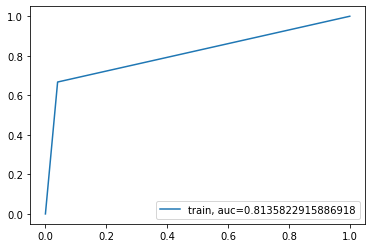

In [92]:
# ROC in train dataset
fpr, tpr, threshold = metrics.roc_curve(y_train, preds_train)
auc = metrics.auc(fpr, tpr)
print("ROC AUC in train dataset", auc)
plt.plot(fpr, tpr, label = "train, auc=" + str(auc))
plt.legend(loc = 4)

ROC AUC in train dataset 0.7999489011537908


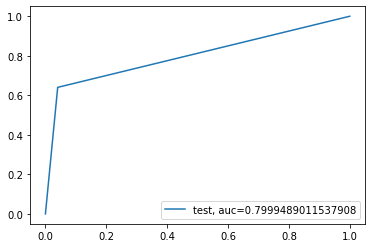

In [93]:
# ROC in train dataset
fpr, tpr, threshold = metrics.roc_curve(y_test, preds_test)
auc = metrics.auc(fpr, tpr)
print("ROC AUC in train dataset", auc)
plt.plot(fpr, tpr, label = "test, auc=" + str(auc))
plt.legend(loc = 4)

## 5. Conclusion

1. Various modeling technique is used on the given churn dataframe such as **Logistic Regression, Randon Forest and XGBoost**
2. The most accuracy and other significance is found in **Randon Forest** and **Hyper paramter tuned Logistic regression**
3. To conclude the comparison, **Randon Forest** is the best amount the three

In [94]:
# Finding feature importance
importances = trained_rf.feature_importances_
cols = X.columns

feature_importance = pd.DataFrame(sorted(zip(importances, list(cols)), reverse=True), columns={'col_name','importance'})

# Top 20 features
feature_importance.head(20) 

,importance,col_name
0,0.099192,last_day_rch_amt_8
1,0.090902,arpu_8
2,0.075596,loc_ic_mou_8
3,0.067416,max_rech_amt_8
4,0.063426,loc_og_mou_8
5,0.043790,av_rech_amt_data_8
6,0.040028,total_rech_amt_data_8
7,0.036561,roam_ic_mou_8
8,0.036451,roam_og_mou_8
9,0.031557,total_rech_num_8


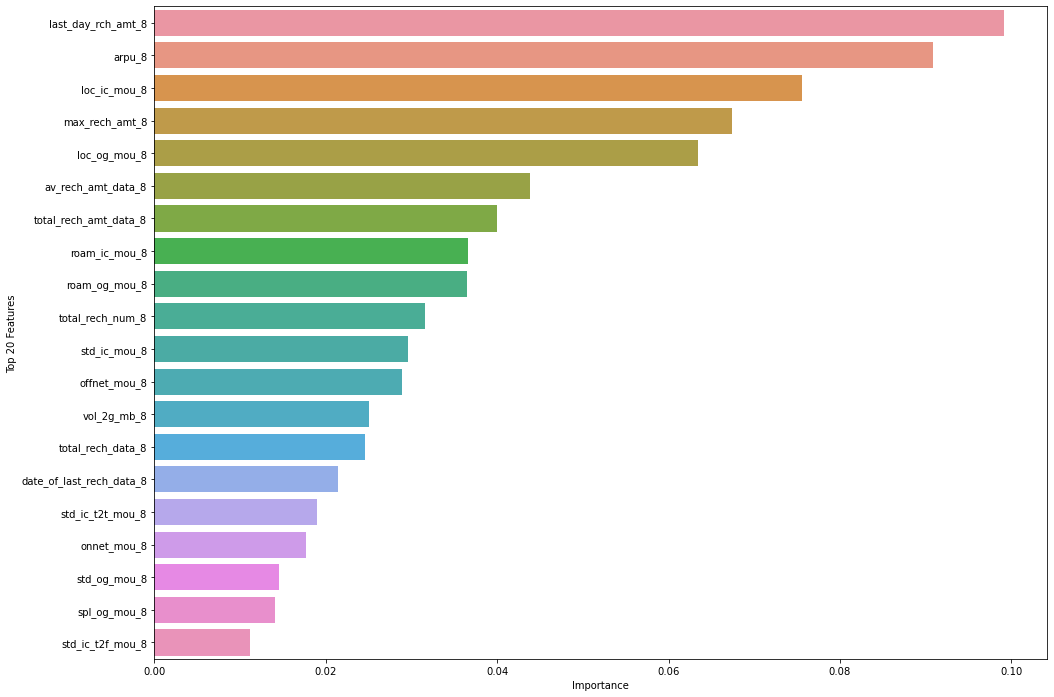

In [96]:
#Top 20 Features
plt.figure(figsize=(16, 12))

plot = sns.barplot(x='importance', y= 'col_name', data=feature_importance[0:20],orient='h')
plot.set(xlabel = 'Importance', ylabel = 'Top 20 Features')
plt.show()

### Final Insights:

- Previous month is really an important factor for churn prediction. 
    For example to predict churn of 9, month 8 is most important month to consider.
    
- Last recharge amount, average revenue per user and last month incming are the top three deciding factors. If these three decreases in previous month churning probability increases.


<b>Recommendations:</b> 

 - Company can focus on last day recharge amount and reducing the range of the last day recharge amount can reduce the churn 

 - Company can focus on Average revenue per user, if revenue generating tendency of an user decreases he/she is more likely to churn.